# Taller splines cubicos

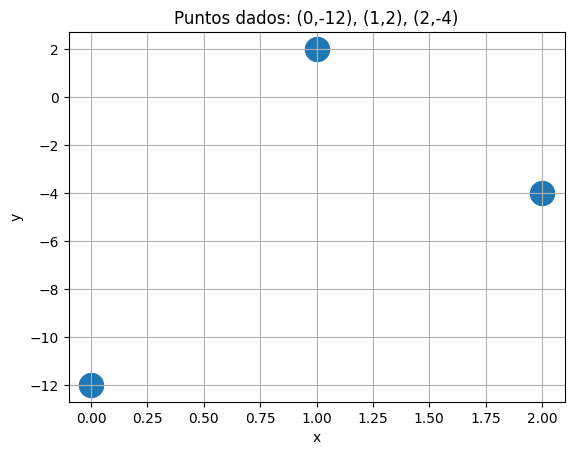

In [1]:
import matplotlib.pyplot as plt

# Puntos dados
x = [0, 1, 2]
y = [-12, 2, -4]

# Crear figura
plt.figure()

# Dibujar solo los puntos (grandes)
plt.scatter(x, y, s=300)

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Puntos dados: (0,-12), (1,2), (2,-4)")

# Cuadrícula
plt.grid(True)

# Mostrar gráfica
plt.show()


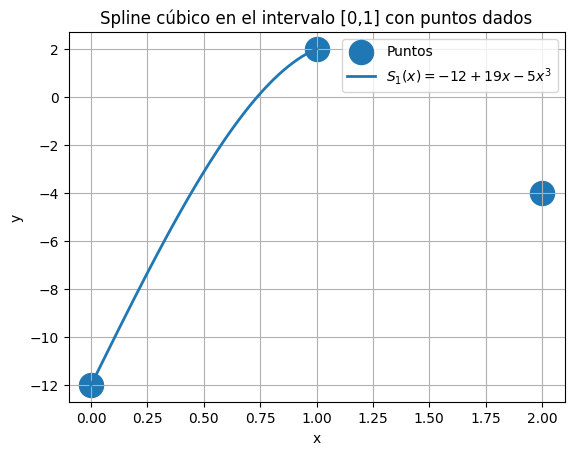

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos dados
x_points = [0, 1, 2]
y_points = [-12, 2, -4]

# Función S1(x) para el intervalo [0,1]
def S1(x):
    return -12 + 19*x - 5*x**3

# Generar valores para dibujar S1(x)
x_curve = np.linspace(0, 1, 200)
y_curve = S1(x_curve)

# Crear figura
plt.figure()

# Dibujar los puntos (grandes)
plt.scatter(x_points, y_points, s=300, label="Puntos")

# Dibujar la función S1(x)
plt.plot(x_curve, y_curve, linewidth=2, label=r"$S_1(x) = -12 + 19x - 5x^3$")

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline cúbico en el intervalo [0,1] con puntos dados")

# Cuadrícula
plt.grid(True)

# Leyenda
plt.legend()

# Mostrar gráfica
plt.show()


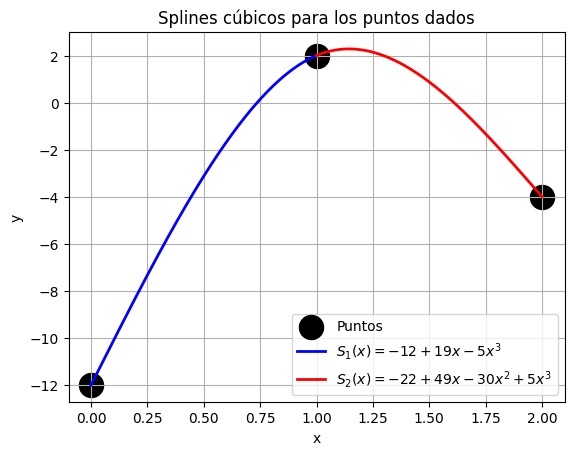

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos dados
x_points = [0, 1, 2]
y_points = [-12, 2, -4]

# Funciones del spline
def S1(x):
    return -12 + 19*x - 5*x**3

def S2(x):
    return -22 + 49*x - 30*x**2 + 5*x**3

# Intervalos
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)

# Evaluar
y1 = S1(x1)
y2 = S2(x2)

# Crear figura
plt.figure()

# Puntos
plt.scatter(x_points, y_points, s=300, label="Puntos", color="black")

# Spline S1 (color azul)
plt.plot(x1, y1, linewidth=2, color="blue", 
         label=r"$S_1(x) = -12 + 19x - 5x^3$")

# Spline S2 (color rojo)
plt.plot(x2, y2, linewidth=2, color="red", 
         label=r"$S_2(x) = -22 + 49x - 30x^2 + 5x^3$")

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Splines cúbicos para los puntos dados")

# Cuadrícula
plt.grid(True)

# Leyenda
plt.legend()

# Mostrar gráfica
plt.show()
